Предположим, что Толя любит авокадо и решил посмотреть динамику цен на данный продукт в США. Имеется следующий набор данных от Hass Avocado Board 🥑:
- Date — дата
- AveragePrice — средняя цена одного авокадо
- Total Volume — количество проданных авокадо
- 4046 — количество проданных авокадо PLU* 4046
- 4225 — количество проданных авокадо PLU 4225
- 4770 — количество проданных авокадо PLU 4770
- Total Bags — всего упаковок
- Small Bags — маленькие упаковки
- Large Bags — большие
- XLarge Bags — очень большие
- type — обычный или органический
- year — год
- Region — город или регион the city or region of the observation
    - PLU — код товара (Product Lookup code)
    - В датафрейме находятся данные не за каждый день, а за конец каждой недели. Для каждой даты есть несколько наблюдений, отличающихся по типу авокадо и региону продажи. Предположим, что нас это разделение не интересует, поэтому в avocado_mean записаны агрегированные данные, где:

avocado_mean = pd.read_csv("path",
                           index_col=0, squeeze=True, parse_dates=['Date'])

                           Date
                           2015-01-04    1.301296
                           2015-01-11    1.370648
                           2015-01-18    1.391111
                           2015-01-25    1.397130
                           2015-02-01    1.247037
                           Name: AveragePrice, dtype: float64



In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [52]:
avocado_mean = pd.read_csv("/Users/a2v/Desktop/Python/DA/6/Задания/avocado_mean.csv", 
                           parse_dates=['Date'],  index_col= 0)

In [53]:
avocado_mean.head()

,AveragePrice
Date,
2015-01-04,1.301296
2015-01-11,1.370648
2015-01-18,1.391111
2015-01-25,1.397130
2015-02-01,1.247037


Посчитайте скользящее среднее цены авокадо (AveragePrice) с окном равным 3 (window). Чему равно максимальное значение? Ответ округлите до 2 знаков после точки.

In [58]:
avocado_mean_rolling = round(avocado_mean.rolling(3).mean().max()[0], 2)
avocado_mean_rolling

1.85

Отлично! Помимо авокадо, Толя любит смотреть на графики. Самое время посмотреть, как изменится график в зависимости от выбранного размера окна.
Ваша задача — построить графики скользящего среднего с разными значениями параметра window (2, 4, 10, 50), посмотреть на изменения.

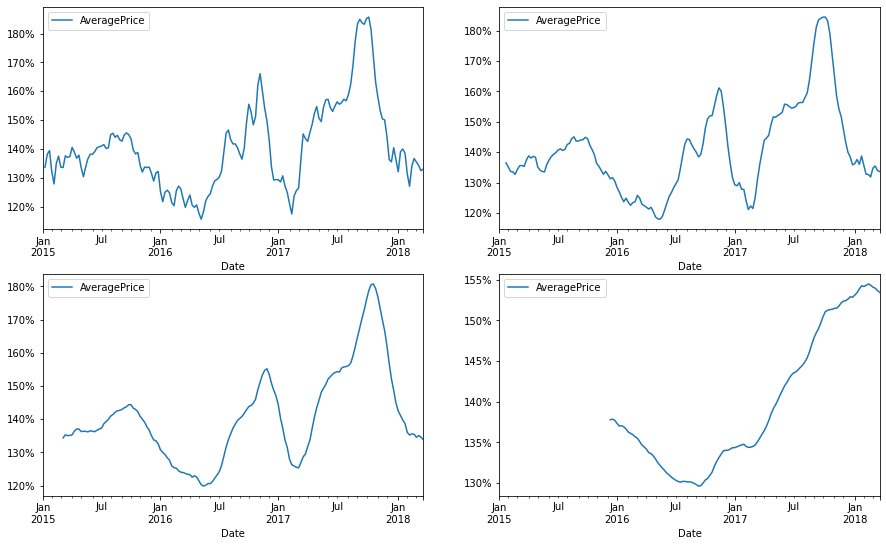

In [88]:
f, axes = plt.subplots(2, 2, figsize=(15, 9))
for i, ax in zip([2, 4, 10, 50], [x for v in axes for x in v]):
    pic = avocado_mean.rolling(i).mean().plot(ax=ax)
    pic.set_yticklabels (['{:.0%}'.format(n) for n in ax.get_yticks()])
plt.show()

Используйте агрегированные данные avocado_mean.csv о ценах на авокадо и примените функцию ewm() с параметром span=2, чтобы получить экспоненциальное скользящее среднее. Запишите результат в avocado_ewm.

In [119]:
avocado_ewm = avocado_mean.ewm(span=2).mean()

И еще один стэп, чтобы закрепить материал. Импортируйте полные данные, (avocado_full.csv) указав index_col=0 (использовать первую колонку как индекс).
Для авокадо типа organic (type) в Чикаго (region) посчитайте скользящее среднее с окном 4 и экспоненциальное скользящее среднее с параметром span=4. Постройте графики, а затем заполните пропуски. Числа округлите до трех знаков после точки.

In [91]:
avocado_full = pd.read_csv('/Users/a2v/Desktop/Python/DA/6/Задания/avocado_full.csv', index_col=0)

In [110]:
avocado_full_rolling = round(avocado_full[(avocado_full.region == "Chicago")&(avocado_full.type == "organic")] \
                             .groupby('Date') \
                             .agg({'AveragePrice':'mean'}) \
                             .rolling(4, min_periods=1).mean(), 3)

In [120]:
avocado_full_ewm = round(avocado_full[(avocado_full.region == "Chicago")&(avocado_full.type == "organic")] \
                         .groupby('Date') \
                         .agg({'AveragePrice':'mean'}) \
                         .ewm(span=4).mean(), 3)

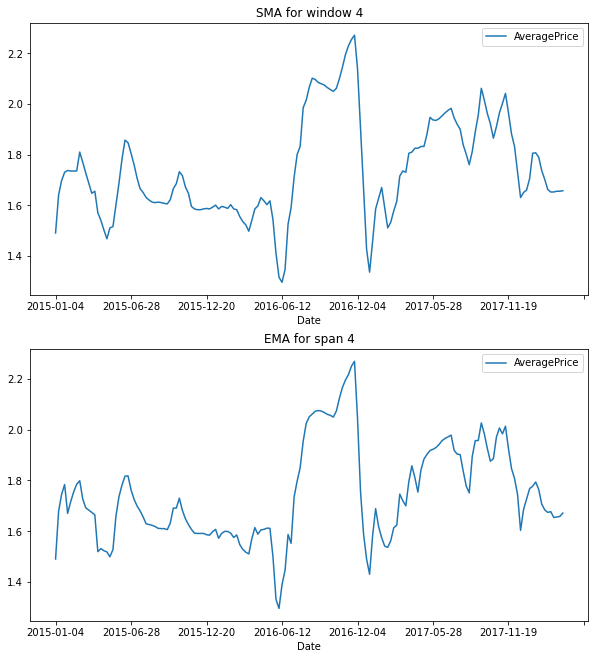

In [137]:
f, ax = plt.subplots(2, 1, figsize=(10, 11))
avocado_full_rolling.plot(ax=ax[0])
ax[0].set_title('SMA for window 4')
avocado_full_ewm.plot(ax=ax[1])
ax[1].set_title('EMA for span 4')
plt.show()

Далее будем работать с данными по опозданиям в заключении сделок!
В файле delays находится информация о том какие компании с кем и на какую сумму заключали сделки, а самое важное – насколько они при этом опоздали. Вот сабсэт данных

 		client_idcompany_id	delay		revenue
 	0	2389	4240	-1 days -14:57:48.000000000	705436
 	1	7614	9544	-4 days -02:14:23.000000000	859266
 	2	2052	2427	-0 days -06:08:57.000000000	812416
 	3	9635	8054	-0 days -23:40:19.000000000	162312
 	4	8154	5503	-1 days -13:21:53.000000000	658844

Сначала давайте переведём delay в timedelta формат. Обратите внимание, что так просто столбец не переведётся – нужно будет убрать -. Сохраните данные в переменную df, отформатируйте колонку нужным способом (подсказка – уберите -) и переведите её в тип timedelta.
Могут понадобиться:
pd.to_timedelta()
pd.Series.str

In [148]:
df = pd.read_csv('/Users/a2v/Desktop/Python/DA/6/Задания/delays.csv')

In [150]:
df['delay'] = df.delay.str.replace('-', '')

In [151]:
df['delay'] = pd.to_timedelta(df['delay'])

Время это хорошо, но хотелось бы также разбить его на промежутки. Разбейте время на 3 интервала и поместите соответствующие значения в колонку delay_categorical
Могут понадобится:
pd.cut()

In [152]:
df['delay_categorical'] = pd.cut(df['delay'], bins=3)

In [153]:
df.head()

,client_id,company_id,delay,revenue,delay_categorical
0,2389,4240,1 days 14:57:48,705436,"(0 days 00:27:11.587000, 1 days 16:19:58.666666]"
1,7614,9544,4 days 02:14:23,859266,"(3 days 08:05:36.333333, 4 days 23:51:14]"
2,2052,2427,0 days 06:08:57,812416,"(0 days 00:27:11.587000, 1 days 16:19:58.666666]"
3,9635,8054,0 days 23:40:19,162312,"(0 days 00:27:11.587000, 1 days 16:19:58.666666]"
4,8154,5503,1 days 13:21:53,658844,"(0 days 00:27:11.587000, 1 days 16:19:58.666666]"


Разбилось конечно неплохо, но хочется чуть более целые значения и более человеческие названия. В этом нам помогут аргументы функции pd.cut! 
Перезадайте колонку delay_categorical, чтобы значения в ней были
- 'less than 1 day' – время от 0 до 1 дня
- '1-2 days' – от 1 до 2 дней
- '2-3 days' – от 2 до 3 дней
- 'more than 3 days' – больше 3 дней

Например, для следующего примера
client_id  company_id  delay            revenue
14345      54631       2 days 13:34:45  145345
54434      54834       1 days 08:26:00  453245
34905      49834       0 days 00:26:03  14543

результом будет
client_id  company_id  delay            revenue  delay_categorical
14345      54631       2 days 13:34:45  145345   2-3 days
54434      54834       1 days 08:26:00  453245   1-2 days
34905      49834       0 days 00:26:03  14543    less than 1 day

Могут понадобится:
pd.cut()
pd.to_timedelta()

In [156]:
df['delay_categorical'] = pd.cut(df['delay'],
                                 bins = 4,
                                 labels=["less than 1 day", "1-2 days", "2-3 days", "more than 3 days"])

Прекрасно! Теперь постройте интерактивный барплот с тем, насколько часто задерживаются сделки, выясните самый редкий и самый частый варианты.

In [164]:
delay = df.delay_categorical.value_counts()

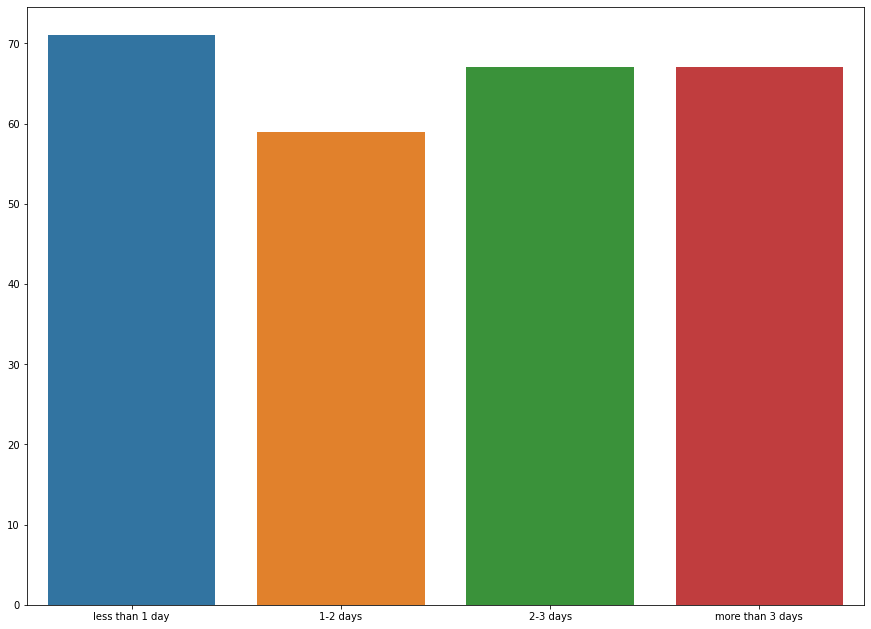

In [167]:
plt.figure(figsize = (15,11))
sns.barplot(delay.index, delay.values)
plt.show()

Вывод:
- сделки задерживаются:
    - реже - в диапазоне (1-2 дня);
    - чаще - в диапазоне (менее 1 дня);